# __Input and output DFN file formats__

### Problem statement
How to import/export DFN with DFN.Lab.


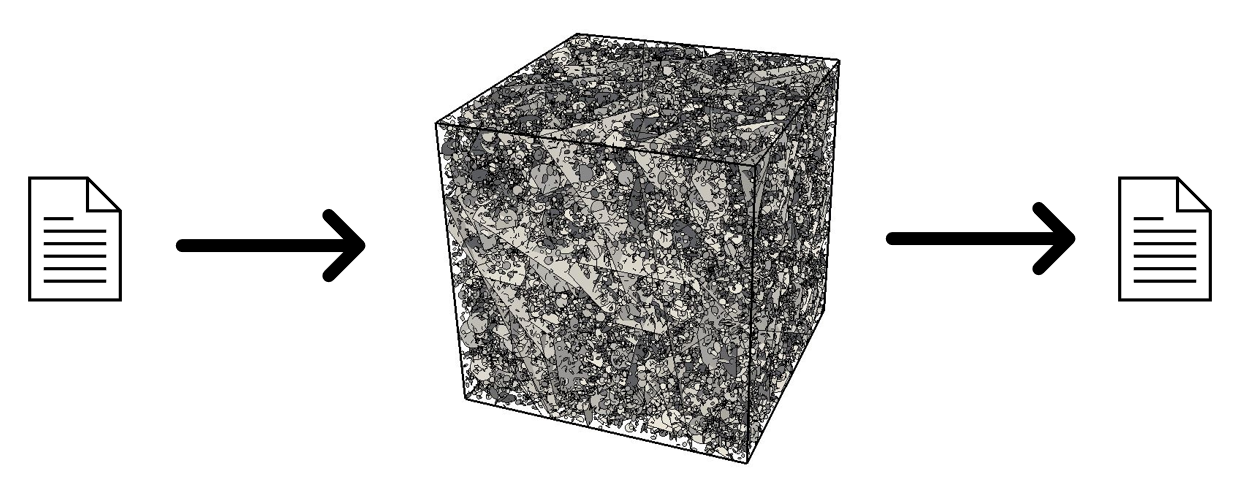
<center>
Input and output DFN file formats
</center>

### What will you learn ?
- Import DFNs from file
- Export DFNs to file

### DFN.Lab model

DFN input and output are handled with the __IO__ library. We can read/write files containing the fracture geometries and any additional fracture property (extra).
<br>
We will also need the __Basis__ library.
<br>
We use [_pyvista_](https://docs.pyvista.org) for embedded visualization of generated networks in our notebook.
<br>
Plot functions are implemented in [Tutorials/sources/functions.py](sources/functions.py).

In [1]:
import dfnlab.Basis as basis
import dfnlab.IO as io
import os

________________________


# Import a DFN

First, we create a domain to which an empty DFN is linked. 
<br>
We then import fractures into this empty DFN. We let fractures to be automatically truncated at the edges of the domain.

In [2]:
the_system = basis.System()
the_system.buildParallelepiped(center=[0, 0, 0], L1=1.)
fnet = basis.DFN(the_system)

#### FRACMAN file format
DFN.Lab can read/write files generated by the software Fracman in the ASCII FRACMAN file format ('.fab' extension).
<br>
In this format, fractures are defined as polygons.

In [3]:
io.load_DFN_file(fnet,filename='sources/Ktest.fab', format="fracman")
print("Number of fractures in FRACMAN file: {}".format(fnet.nbFractures()))

Number of fractures in FRACMAN file: 10


We can visualize the DFN.

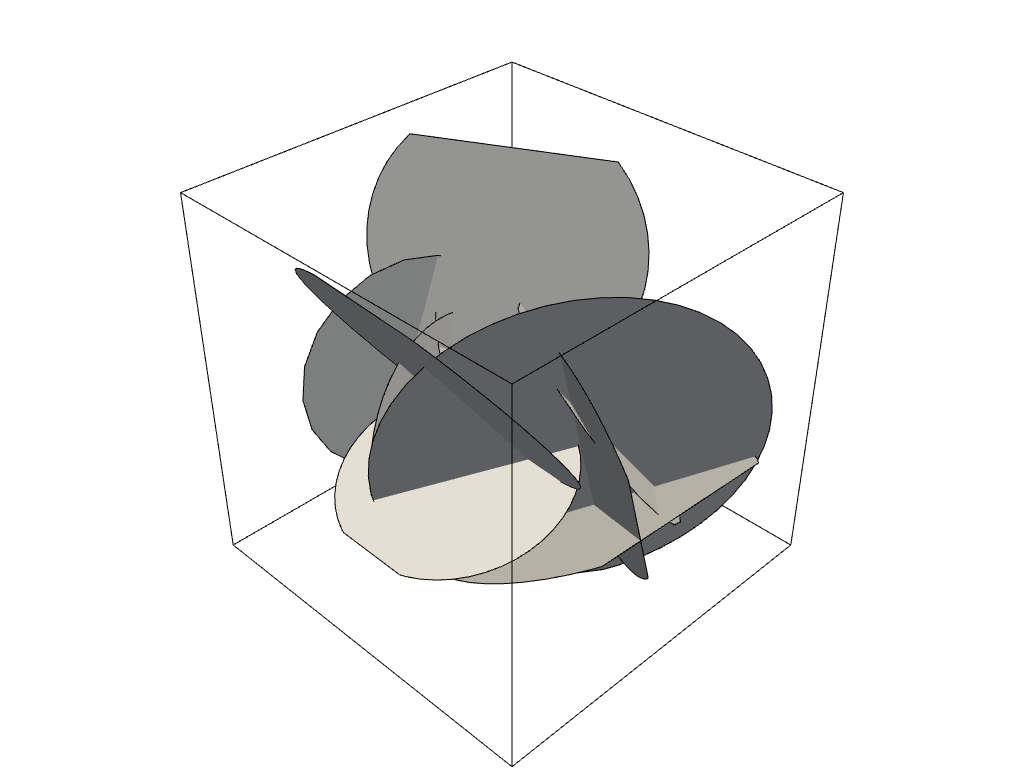

In [4]:
from sources.functions import plot_dfn

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
    
plot_dfn(fnet,pathFolder+"/tuto4_dfn1")

#### DISK file format
The DISK file format ('.disk' extension) is from Itasca softwares. It contains fractures disks with associated properties.
<br>
The first line describes attribute names.
<br>
The second line gives the number of fractures.
<br>
Then, there is a line per fracture giving its properties.
<br>
Let's have a look, opening this ASCII file in reading mode.

In [5]:
f = open('sources/Ktest.disk', 'r')
print (f.read())

;"label" id xc yc zc dip dipdir half_length aperture length pi cluster_index
10 3
"intact" 0 0.244267 0.0681722 -0.0954095 15.7759 85.9477 0.282056 1 0.564112 0.991684 0
"intact" 1 -0.255995 -0.1715 -0.211691 57.0846 329.05 0.418505 1 0.83701 0.839307 0
"intact" 2 0.29886 0.0775116 0.196606 54.5864 272.813 0.375228 1 0.750456 0.987292 0
"intact" 3 0.0288434 0.259341 -0.0460561 75.8303 292.384 0.309667 1 0.619334 0.961218 0
"intact" 4 -0.0277118 0.239002 -0.245398 27.4579 185.812 0.399674 1 0.799349 0.921419 0
"intact" 5 0.0343927 0.229688 -0.0569519 80.0719 214.279 0.462595 1 0.92519 0.997245 0
"intact" 6 -0.0963918 -0.122488 0.27343 74.0091 62.0712 0.340378 1 0.680757 0.902483 0
"intact" 7 -0.136344 0.158349 -0.0672052 54.3603 302.777 0.320711 1 0.641423 1 0
"intact" 8 0.077179 -0.267794 -0.0376788 87.544 13.8559 0.287246 1 0.574493 1 0
"intact" 9 0.0627129 -0.117615 -0.210221 77.2561 348.219 0.33305 1 0.666099 0.979061 0



Number of fractures in DISK file: 10


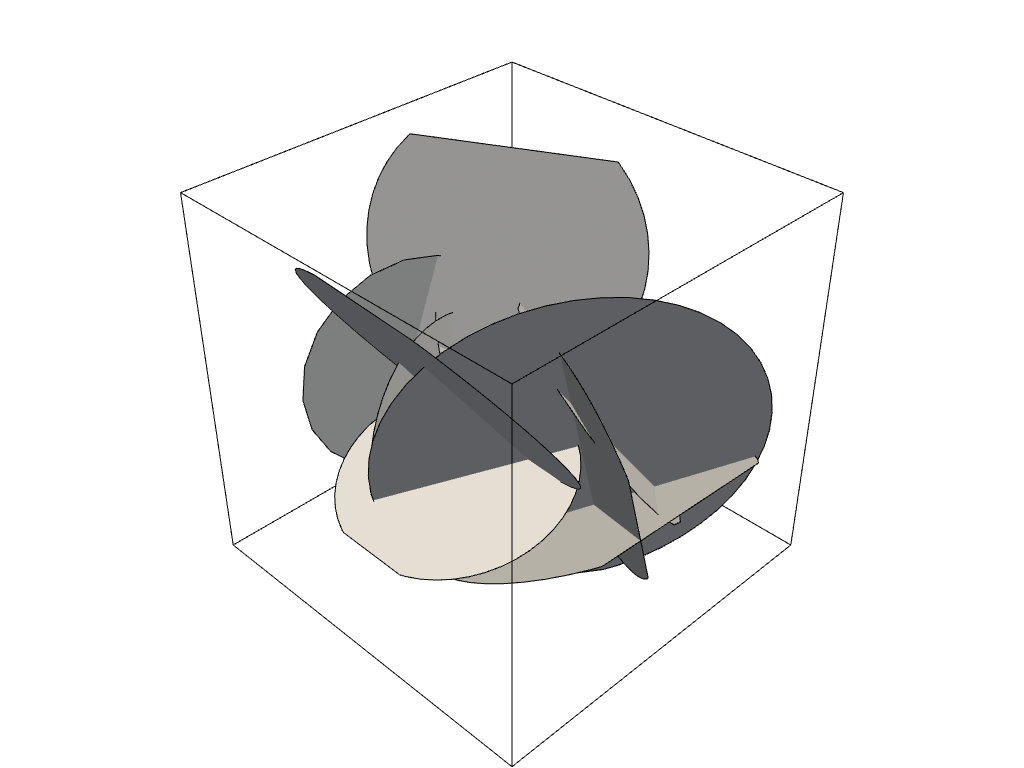

In [6]:
the_system = basis.System()
the_system.buildParallelepiped(center=[0, 0, 0], L1=1.)
fnet = basis.DFN(the_system)

io.load_DFN_file(fnet,filename='sources/Ktest.disk', format="disk") 
print("Number of fractures in DISK file: {}".format(fnet.nbFractures()))

plot_dfn(fnet,pathFolder+"/tuto4_dfn2")

# Export a DFN

Once generated, we export the DFN in ASCII file.
<br>


#### FRACMAN file format

In [7]:
io.write_DFN_file(fnet,'Tmp/my_dfn1.fab', format="fracman")

#### DISK file format

In [8]:
io.write_DFN_file(fnet,'Tmp/my_dfn1.disk', format="disk")

Fracture extras are automatically stored in output formats, including the ones defined by the user.

In [9]:
for frac in fnet:
    dip, dipd = frac.dipD()
    frac.setExtra("dip",dip)
    frac.setExtra("dipd",dipd)
io.write_DFN_file(fnet,'Tmp/my_dfn2.fab', format="fracman",extraList=["dip","dipd"])
io.write_DFN_file(fnet,'Tmp/my_dfn2.disk', format="disk",extraList=["dip","dipd"])

In [10]:
f = open('Tmp/my_dfn2.disk', 'r')
print (f.read())

;"label" id xc yc zc dip dipdir half_length dip dipd
10 2
"Fracture" 0 0.244267 0.0681722 -0.0954095 15.7759 85.9477 0.282056 15.7759 85.9477
"Fracture" 1 -0.255995 -0.1715 -0.211691 57.0846 329.05 0.418505 57.0846 329.05
"Fracture" 2 0.29886 0.0775116 0.196606 54.5864 272.813 0.375228 54.5864 272.813
"Fracture" 3 0.0288434 0.259341 -0.0460561 75.8303 292.384 0.309667 75.8303 292.384
"Fracture" 4 -0.0277118 0.239002 -0.245398 27.4579 185.812 0.399674 27.4579 185.812
"Fracture" 5 0.0343927 0.229688 -0.0569519 80.0719 214.279 0.462595 80.0719 214.279
"Fracture" 6 -0.0963918 -0.122488 0.27343 74.0091 62.0712 0.340378 74.0091 62.0712
"Fracture" 7 -0.136344 0.158349 -0.0672052 54.3603 302.777 0.320711 54.3603 302.777
"Fracture" 8 0.077179 -0.267794 -0.0376788 87.544 13.8559 0.287246 87.544 13.8559
"Fracture" 9 0.0627129 -0.117615 -0.210221 77.2561 348.219 0.33305 77.2561 348.219



#### VTP file format
DFNs can be exported into geometry files for visualisation. DFN.Lab supports VTP and STL files, that can be imported in visualisation software such as [Paraview](https://www.paraview.org).
<br>
For stereolithography file ('.stl'):

In [11]:
io.write_DFN_file(fnet,'Tmp/my_dfn.stl', format="stl")

For vtkPolydata file ('.vtp') 

In [12]:
io.write_DFN_file(fnet,'Tmp/my_dfn', format="vtp")

Again, extras can be exported directly in VTP files:

In [13]:
for frac in fnet:
    dip, dipd = frac.dipD()
    frac.setExtra("dip",dip)
    frac.setExtra("dipd",dipd)

io.write_DFN_file(fnet,'Tmp/my_dfn_with_extra', format="vtp",extraList=["dip","dipd"],binary=True)

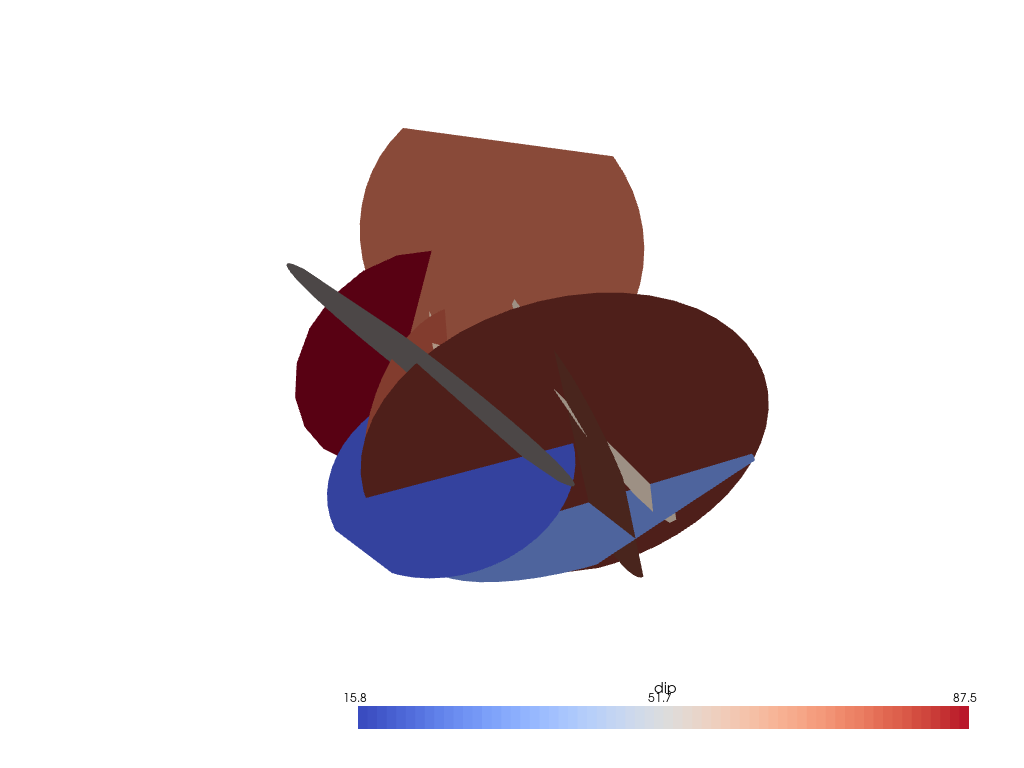

In [14]:
from sources.functions import plot_dfn_from_vtp_file
plot_dfn_from_vtp_file(pathFolder+"/my_dfn_with_extra",value="dip")